# WeatherPy
----

#### 3 Observable trends in the Data
1) The cities closer to the equator (O degrees latitude) recorded a higher Max Temperature on average.\
2) The recorded units of measure for "cloudiness" are biased towards a 0 or 100% record, with few in between.\
3) There is not a strong correlation between latitude and wind speed, however, there are few cities with high wind speeds
and wind speeds are low on average.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create lists to hold values
City_ID = []
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []


In [4]:
# Declare the url
url = "http://api.openweathermap.org/data/2.5/weather?"

print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the cities
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    city_weather = requests.get(query_url).json()
    
    try: 
        City.append(city_weather['name'])
        Cloudiness.append(city_weather['clouds']['all'])
        Country.append(city_weather['sys']['country'])
        Date.append(city_weather['dt'])
        Humidity.append(city_weather['main']['humidity'])
        Lat.append(city_weather['coord']['lat'])
        Lng.append(city_weather['coord']['lon'])
        Max_Temp.append(city_weather['main']['temp_max'])
        Wind_Speed.append(city_weather['wind']['speed'])
        City_ID.append({cities.index(city)})
        print(f'Processing: {cities.index(city)} | {city}')
    except:
        print(f"We could not find {city}")
        pass

print(f"------------------------")    
print(f"Data Retrieval Complete")
print(f"------------------------")

Beginning Data Retrieval
------------------------
Processing: 0 | crib point
Processing: 1 | barrow
Processing: 2 | lata
Processing: 3 | progreso
We could not find barentsburg
Processing: 5 | ushuaia
Processing: 6 | hithadhoo
Processing: 7 | usogorsk
Processing: 8 | soyo
Processing: 9 | shitanjing
Processing: 10 | ust-omchug
Processing: 11 | tasiilaq
We could not find yanan
Processing: 13 | tuktoyaktuk
We could not find utiroa
Processing: 15 | loa janan
Processing: 16 | abnub
Processing: 17 | ouadda
Processing: 18 | pevek
Processing: 19 | sioux lookout
Processing: 20 | ahuimanu
Processing: 21 | te anau
Processing: 22 | mataura
Processing: 23 | hobart
Processing: 24 | usinsk
Processing: 25 | kostyantynivka
Processing: 26 | albany
Processing: 27 | larap
Processing: 28 | kapaa
Processing: 29 | hambantota
Processing: 30 | sorong
Processing: 31 | puerto ayora
We could not find samusu
Processing: 33 | ust-maya
Processing: 34 | iqaluit
Processing: 35 | cape town
Processing: 36 | punta arenas


Processing: 297 | torbay
Processing: 298 | nome
Processing: 299 | namatanai
Processing: 300 | paita
Processing: 301 | yukamenskoye
Processing: 302 | fort nelson
Processing: 303 | biryusinsk
Processing: 304 | viedma
Processing: 305 | olafsvik
Processing: 306 | kidal
Processing: 307 | kulhudhuffushi
Processing: 308 | vila velha
Processing: 309 | beloha
Processing: 310 | rio grande
Processing: 311 | saint-denis
Processing: 312 | ati
We could not find amderma
Processing: 314 | maputo
Processing: 315 | purna
Processing: 316 | skibbereen
Processing: 317 | lerwick
Processing: 318 | umm kaddadah
Processing: 319 | marabba
Processing: 320 | omsukchan
Processing: 321 | talnakh
Processing: 322 | norrtalje
Processing: 323 | les cayes
Processing: 324 | yar-sale
Processing: 325 | gatak
Processing: 326 | minatitlan
Processing: 327 | samarai
We could not find meyungs
Processing: 329 | komsomolskiy
Processing: 330 | carnarvon
Processing: 331 | williston
Processing: 332 | adrar
Processing: 333 | vestmann

Processing: 597 | kloulklubed
Processing: 598 | lamar
Processing: 599 | bundaberg
Processing: 600 | grand forks
Processing: 601 | cootamundra
Processing: 602 | manavalakurichi
Processing: 603 | fortuna
Processing: 604 | biak
Processing: 605 | zabol
Processing: 606 | ambilobe
Processing: 607 | vicuna
Processing: 608 | luanda
Processing: 609 | seymchan
Processing: 610 | gamba
Processing: 611 | kudat
Processing: 612 | alofi
Processing: 613 | tibiri
Processing: 614 | avon park
Processing: 615 | rundu
Processing: 616 | qasigiannguit
Processing: 617 | moron
Processing: 618 | omboue
Processing: 619 | oskarshamn
Processing: 620 | raha
Processing: 621 | parvatsar
Processing: 622 | sinjai
Processing: 623 | mandali
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Create a DataFrame to store the values from the API calls
city_data_df = pd.DataFrame({
    "City ID": City_ID,
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date})

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")


city_data_df.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Crib Point,-38.3500,145.2000,86.0,48,0,4.23,AU,2021-02-10 02:29:49
1,{1},Barrow,71.2906,-156.7887,-22.0,69,1,17.27,US,2021-02-10 02:24:57
2,{2},Lata,40.1629,-8.3327,55.0,93,100,7.00,PT,2021-02-10 02:29:49
3,{3},Progreso,21.2833,-89.6667,77.0,78,40,14.97,MX,2021-02-10 02:29:49
4,{5},Ushuaia,-54.8000,-68.3000,62.6,72,0,4.61,AR,2021-02-10 02:29:50


In [6]:
# Write the data to a csv
city_data_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,19.561527,16.980536,50.887924,73.467128,52.717993,7.369585
std,32.519219,89.556533,30.871026,20.026407,39.665434,5.475047
min,-54.800000,-175.200000,-38.200000,12.000000,0.000000,0.250000
25%,-4.913100,-60.361675,32.705000,64.000000,7.000000,3.440000
50%,21.858700,18.710150,60.980000,79.000000,62.000000,6.140000
75%,44.966375,101.670850,74.650000,88.000000,90.000000,9.220000
max,78.218600,178.416700,94.280000,100.000000,100.000000,35.680000


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(city_data_df.loc[city_data_df["Humidity"] > 100].index, inplace=False)

clean_city_data.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Crib Point,-38.3500,145.2000,86.0,48,0,4.23,AU,2021-02-10 02:29:49
1,{1},Barrow,71.2906,-156.7887,-22.0,69,1,17.27,US,2021-02-10 02:24:57
2,{2},Lata,40.1629,-8.3327,55.0,93,100,7.00,PT,2021-02-10 02:29:49
3,{3},Progreso,21.2833,-89.6667,77.0,78,40,14.97,MX,2021-02-10 02:29:49
4,{5},Ushuaia,-54.8000,-68.3000,62.6,72,0,4.61,AR,2021-02-10 02:29:50


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

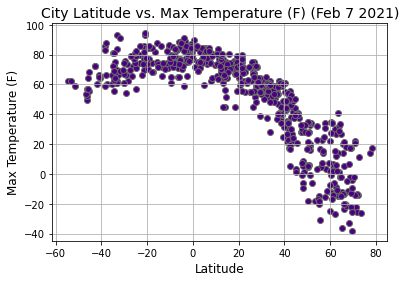

In [9]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="indigo", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Max Temperature (F) (Feb 7 2021)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-temp.png")
plt.show()


The scatter plot above is a visual representation of the Max Temperature (in fahrenheit)\
based on the latitudes of cities in a random sample. This plot indicates that the cities\
closer to the equator (O degrees latitude) recorded a higher Max Temperature on average.

## Latitude vs. Humidity Plot

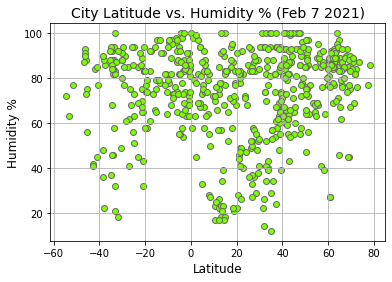

In [10]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="lawngreen", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Humidity % (Feb 7 2021)", fontsize=14)
plt.ylabel("Humidity %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-humidity.png")
plt.show()


The scatter plot above is a visual representation of the Humidity % \
based on the latitudes of cities in a random sample. This plot indicates that\
there is little to no correlation between latitude and recorded humidity %.

## Latitude vs. Cloudiness Plot

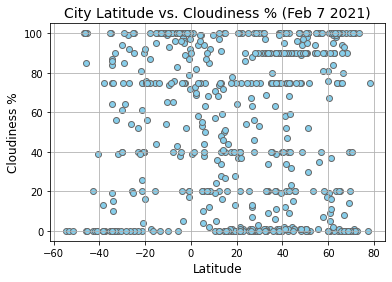

In [11]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Cloudiness % (Feb 7 2021)", fontsize=14)
plt.ylabel("Cloudiness %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-cloudiness.png")
plt.show()


The scatter plot above is a visual representation of the Cloud coverage \
based on the latitudes of cities in a random sample. This plot indicates that there is \
not a correlation between latitude and cloud coverage, however, it can be \
observed that the recorded units are biased towards a 0 or 100% record, with few in between.

## Latitude vs. Wind Speed Plot

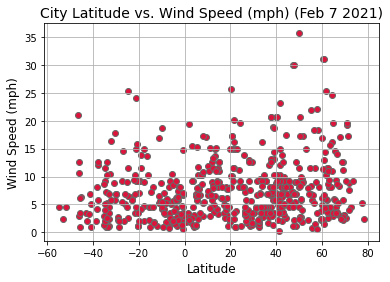

In [12]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="crimson", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Wind Speed (mph) (Feb 7 2021)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-windspeed.png")
plt.show()


The scatter plot above is a visual representation of the Wind Speed (mph) \
based on the latitudes of cities in a random sample. This plot indicates that\
there is not a correlation between latitude and Wind Speed. Also, the outlier \
city shown at latitude 60 is not having a good time.

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

northern_hemisphere.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,{1},Barrow,71.2906,-156.7887,-22.00,69,1,17.27,US,2021-02-10 02:24:57
2,{2},Lata,40.1629,-8.3327,55.00,93,100,7.00,PT,2021-02-10 02:29:49
3,{3},Progreso,21.2833,-89.6667,77.00,78,40,14.97,MX,2021-02-10 02:29:49
6,{7},Usogorsk,63.4106,48.6872,-14.94,88,98,3.67,RU,2021-02-10 02:29:50
8,{9},Shitanjing,39.2342,106.3439,34.99,66,0,13.13,CN,2021-02-10 02:29:50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7807368990909932


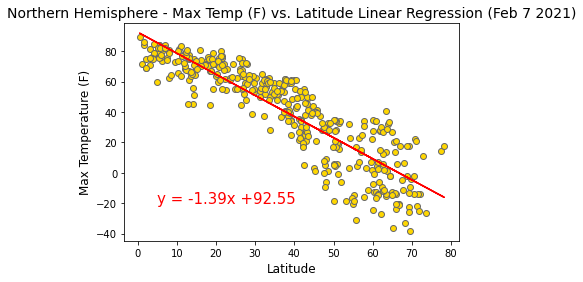

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a Scatter Plot for max temperature vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2910517829891136


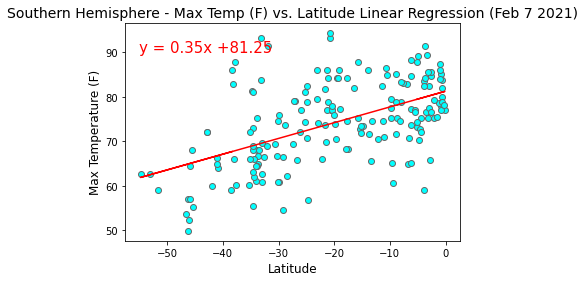

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a Scatter Plot for max temperature vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The regression plots above display the Maximum Temperatures (F) recorded\
and the correlation of the records based on the latitudes of cities in a \
random sample from the Northern Hemisphere and the Southern Hemisphere. \
The plots and regression models indicate that the maximum temperatures \
for cities closer to the equator (0 degrees latitude) are typically higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08445481765312723


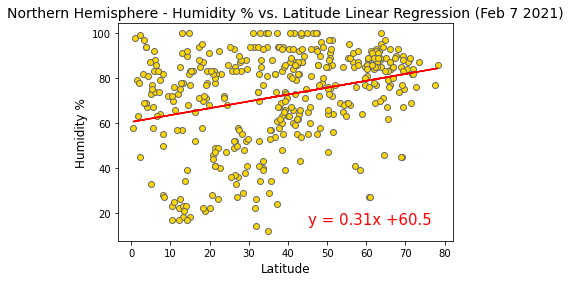

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a Scatter Plot for humidity vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Humidity % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity %', fontsize=12)

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03303096367608935


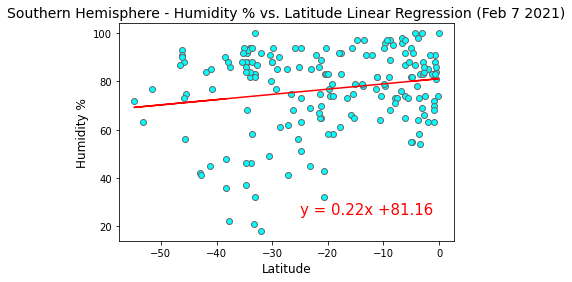

<Figure size 432x288 with 0 Axes>

In [17]:
# Create a Scatter Plot for humidity vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Humidity % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity %', fontsize=12)

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The regression plots above display the Humidity % recorded\
and the correlation of the records based on the latitudes of cities in a\
random sample from the Northern Hemisphere and the Southern Hemisphere.\
The plots and regression models indicate that there is not a strong correlation\
between latitude and humidity %.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005798703710091751


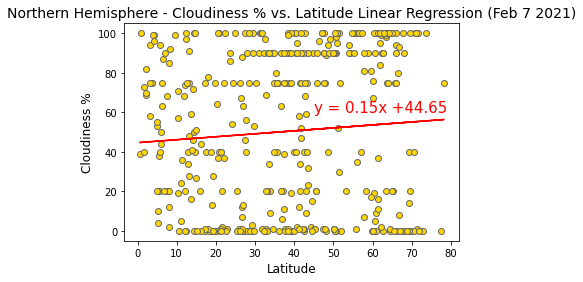

<Figure size 432x288 with 0 Axes>

In [25]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness %', fontsize=12)

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(45,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21242562127860234


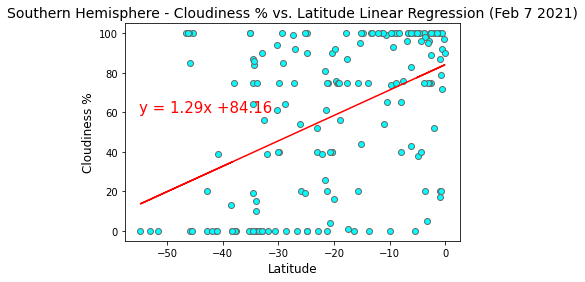

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness %', fontsize=12)

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The regression plots above display the Cloud coverage recorded\
and the correlation of the records based on the latitudes of cities in a\
random sample from the Northern Hemisphere and the Southern Hemisphere.\
The plots and regression models indicate that the correlation between latitude \
and cloud coverage is not strong, but it does show that there is a tendency\
towards 0 and 100 cloudiness measures regardless of latitude or hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004736474738713833


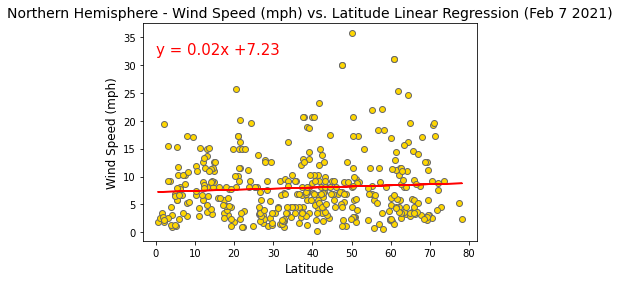

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a Scatter Plot for wind speed vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(0, 32),fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01055885398491172


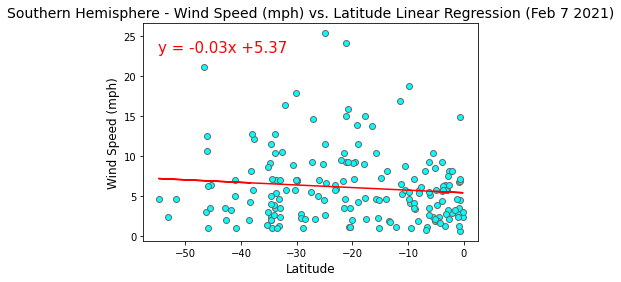

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a Scatter Plot for wind speed vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The regression plots above display the Cloud coverage recorded\
and the correlation of the records based on the latitudes of cities in a\
random sample from the Northern Hemisphere and the Southern Hemisphere.\
The plots and regression models indicate that there is not a strong correlation\
between latitude and wind speed, however, there are few cities with high wind speeds \
and wind speeds are low on average.
